In [1]:
import sys
sys.path.append("../codes/")
from Readfiles import getFnames
from DCdata import readReservoirDC_all
%pylab inline

Efficiency Warning: Interpolation will be slow, use setup.py!

            python setup.py build_ext --inplace
    
Populating the interactive namespace from numpy and matplotlib


In [2]:
directory = "../data/ChungCheonDC/"

In [3]:
fnames = getFnames(directory, dtype="apr", minimumsize=7000.)

In [4]:
fname_temp = fnames[0]
dat_temp,height_temp = readReservoirDC_all(fname_temp)

In [5]:
ntimes = len(fnames)
DATA = np.zeros((dat_temp.shape[0], ntimes))*np.nan
height = np.ones(ntimes)*np.nan

In [6]:
DATA.shape

(380L, 1298L)

In [7]:
for i, fname in enumerate(fnames):
    dat_temp,height_temp = readReservoirDC_all(fname)
    if dat_temp.shape[0] == 380:        
        DATA[:,i] = dat_temp[:,-1]
        height[i] = height_temp[0]      
    else:
        print fname

20150103180000.apr
20150106180000.apr
20150109120000.apr
20150112120000.apr
20150117120000.apr
20150120120000.apr
20150123120000.apr
20150126120000.apr
20150127000000.apr
20150129060000.apr
20150201000000.apr
20150204000000.apr
20150207000000.apr
20150209180000.apr
20150212180000.apr
20150215180000.apr
20150218120000.apr
20150221060000.apr
20150224120000.apr
20150227060000.apr
20150228000000.apr
20150302000000.apr
20150305000000.apr
20150308000000.apr
20150329000000.apr
20150401000000.apr
20150403180000.apr
20150404120000.apr
20150406180000.apr
20150409000000.apr
20150412120000.apr
20150415060000.apr
20150418000000.apr
20150421000000.apr
20150424000000.apr


In [8]:
a = ['1', '2', '3']

In [9]:
def strtofloat(input):
    temp = ""
    for i in input:
        temp += i 
    return float(temp)


In [10]:
# dat_temp,height_temp, datalist = readReservoirDC_all(fnames[79])
# print fnames[79]
# # datalist = readReservoirDC_all(fnames[79])

In [11]:
print fnames[79]

20150120120000.apr


In [12]:
locs = dat_temp[:,:4]

In [13]:
mida = locs[:,:2].sum(axis=1)
midb = locs[:,2:].sum(axis=1)
mid = (mida + midb)*0.5
dz = mida-midb

In [14]:
from ipywidgets import interact, IntSlider

In [15]:
from scipy import interpolate

In [16]:
x = np.linspace(mid.min(), mid.max(), 100)
z = np.linspace(dz.min(), dz.max(), 100)
# grid_x, grid_z = np.mgrid[np.min(mid):np.max(mid), np.min(dz):np.max(dz)]
grid_x, grid_z = np.meshgrid(x,z)

def vizDCtimeSeries(idatum, itime):
#     idatum = 0
    figsize(8,6)
    fig = plt.figure()
    ax1 = plt.subplot(211)
    ax2 = plt.subplot(212)    
#     ax1.plot(mid, dz, '.')

    grid_rho = griddata(mid, dz, DATA[:,itime], grid_x, grid_z, interp='linear')
    grid_rho = grid_rho.reshape(grid_x.shape)
    vmin, vmax = 50, 200.
    ax1.contourf(grid_x, grid_z, grid_rho, 100, vmin =vmin, vmax = vmax, clim=(vmin, vmax), cmap="jet")    
    ax1.contourf(grid_x, grid_z, grid_rho, 100, vmin =vmin, vmax = vmax, clim=(vmin, vmax), cmap="jet")        
    ax1.scatter(mid, dz, s=20, c = DATA[:,itime], edgecolor="None", vmin =vmin, vmax = vmax, clim=(vmin, vmax))
#     ax1.plot(grid_x.flatten(), grid_z.flatten(), 'k.')
    ax1.plot(mid[idatum], dz[idatum], 'ro')    
    ax2.plot(DATA[idatum,:], 'k-', lw=2)
    ax2.set_yscale('log')
    ax2.set_ylim(vmin, vmax)
    ax2_1 = ax2.twinx()
    ax2_1.plot(height)
    ax2_1.set_ylim(15, 21.)
    ax2_1.plot(np.r_[itime, itime], np.r_[15, 21.], 'k--', lw=1)
    ax1.text(0,0, fnames[itime])

<function __main__.vizDCtimeSeries>

C:\Users\sungkeun\Anaconda2\lib\site-packages\matplotlib\scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


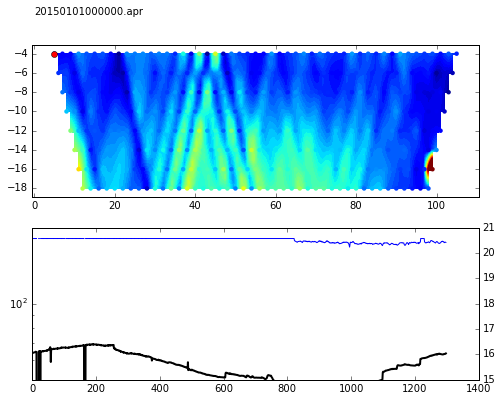

In [17]:
interact(vizDCtimeSeries, idatum=IntSlider(min=0, max=300, step=10, value=0), 
        itime=IntSlider(min=0, max=DATA.shape[1]-1, step=100, value=0))

In [18]:
def vizDCtimeSeriesVariation(idatum, itime):
#     idatum = 0
    figsize(8,6)
    fig = plt.figure()
    ax1 = plt.subplot(211)
    ax2 = plt.subplot(212)    
#     ax1.plot(mid, dz, '.')
    itime_ref = 790
    DATA_ref = DATA[:,itime_ref]
    grid_rho = griddata(mid, dz, DATA[:,itime]/DATA_ref, grid_x, grid_z, interp='linear')
    grid_rho = grid_rho.reshape(grid_x.shape)
    vmin, vmax = 0.9, 1.1
    ax1.contourf(grid_x, grid_z, grid_rho, 100, vmin =vmin, vmax = vmax, clim=(vmin, vmax), cmap="jet")    
    ax1.contourf(grid_x, grid_z, grid_rho, 100, vmin =vmin, vmax = vmax, clim=(vmin, vmax), cmap="jet")        
    ax1.scatter(mid, dz, s=20, c = DATA[:,itime]/DATA_ref, edgecolor="None", vmin =vmin, vmax = vmax, clim=(vmin, vmax))
#     ax1.plot(grid_x.flatten(), grid_z.flatten(), 'k.')
    ax1.plot(mid[idatum], dz[idatum], 'ro')    
    ax2.plot(DATA[idatum,:], 'k-', lw=2)
    ax2.set_yscale('log')
    vmin, vmax = 50., 200.
    ax2.set_ylim(vmin, vmax)
    ax2_1 = ax2.twinx()
    ax2_1.plot(height)
    ax2_1.set_ylim(15, 21.)
    ax2_1.plot(np.r_[itime, itime], np.r_[15, 21.], 'k--', lw=1)
    ax1.text(0,0, fnames[itime])

<function __main__.vizDCtimeSeriesVariation>

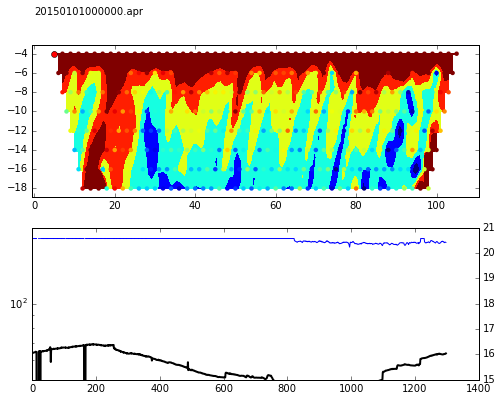

In [19]:
interact(vizDCtimeSeriesVariation, idatum=IntSlider(min=0, max=300, step=10, value=0), 
        itime=IntSlider(min=0, max=DATA.shape[1]-1, step=4, value=0))

In [20]:
DATA.shape

(380L, 1298L)

In [21]:
x = np.linspace(mid.min(), mid.max(), 100)
z = np.linspace(dz.min(), dz.max(), 40)

In [22]:
print z.min(), z.max()
print x.min(), x.max()

-18.0 -4.0
5.0 105.0


In [23]:
np.diff(x)

array([ 1.01010101,  1.01010101,  1.01010101,  1.01010101,  1.01010101,
        1.01010101,  1.01010101,  1.01010101,  1.01010101,  1.01010101,
        1.01010101,  1.01010101,  1.01010101,  1.01010101,  1.01010101,
        1.01010101,  1.01010101,  1.01010101,  1.01010101,  1.01010101,
        1.01010101,  1.01010101,  1.01010101,  1.01010101,  1.01010101,
        1.01010101,  1.01010101,  1.01010101,  1.01010101,  1.01010101,
        1.01010101,  1.01010101,  1.01010101,  1.01010101,  1.01010101,
        1.01010101,  1.01010101,  1.01010101,  1.01010101,  1.01010101,
        1.01010101,  1.01010101,  1.01010101,  1.01010101,  1.01010101,
        1.01010101,  1.01010101,  1.01010101,  1.01010101,  1.01010101,
        1.01010101,  1.01010101,  1.01010101,  1.01010101,  1.01010101,
        1.01010101,  1.01010101,  1.01010101,  1.01010101,  1.01010101,
        1.01010101,  1.01010101,  1.01010101,  1.01010101,  1.01010101,
        1.01010101,  1.01010101,  1.01010101,  1.01010101,  1.01

In [24]:
from SimPEG import Mesh
from scipy import interpolate

In [25]:
hx = np.ones(110)*1.
hy = np.ones(40)*0.5
mesh2D = Mesh.TensorMesh([hx,hy], x0 = '0N')


In [26]:
len(range(90,900,4))

203

In [27]:
timeind = range(0,1200,16)
model = np.zeros((mesh2D.nC,len(timeind)))
hz = np.ones(len(timeind))
mesh = Mesh.TensorMesh([hx,hy,hz], x0 = '0N0')

itime_ref = 790
DATA_ref = DATA[:,itime_ref]
model_ratio = model.copy()
for i, itime in enumerate(timeind) :
    print itime
    F = interpolate.LinearNDInterpolator(np.c_[mid, dz], DATA[:,itime])
    F_ratio = interpolate.LinearNDInterpolator(np.c_[mid, dz], abs(DATA[:,itime]-DATA_ref)/abs(DATA_ref))
    model_ratio[:,i] = F_ratio(mesh2D.gridCC)
    model[:,i] = F(mesh2D.gridCC)

0
16
32
48
64
80
96
112
128
144
160
176
192
208
224
240
256
272
288
304
320
336
352
368
384
400
416
432
448
464
480
496
512
528
544
560
576
592
608
624
640
656
672
688
704
720
736
752
768
784
800
816
832
848
864
880
896
912
928
944
960
976
992
1008
1024
1040
1056
1072
1088
1104
1120
1136
1152
1168
1184


In [28]:
model.shape

(4400L, 75L)

In [29]:
from SimPEG import Utils

In [30]:
Model = Utils.mkvc(model[:,::-1])
Model_ratio = Utils.mkvc(model_ratio[:,::-1])

In [31]:
Model[np.isnan(Model)] = 1e-8
Model_ratio[np.isnan(Model_ratio)] = 1e-8

In [32]:
mesh.writeModelUBC("./dammodel.txt", Model)
mesh.writeModelUBC("./dammodel_ratio.txt", Model_ratio)

In [33]:
mesh.writeUBC("./dammodel_mesh.txt")

In [34]:
!dir

 C 드라이브의 볼륨: TI30939900A
 볼륨 일련 번호: 306C-36FB

 C:\Users\sungkeun\Documents\DamGeophysics\data\ChungCheonDC 디렉터리

2016-03-18  오후 05:47    <DIR>          .
2016-03-18  오후 05:47    <DIR>          ..
2015-05-28  오후 10:12             8,085 20150101000000.apr
2015-05-28  오후 10:12             8,087 20150101060000.apr
2015-05-28  오후 10:13             8,071 20150101120000.apr
2015-05-28  오후 10:13             8,080 20150101180000.apr
2015-05-28  오후 10:14             8,086 20150102000000.apr
2015-05-28  오후 10:14             8,075 20150102060000.apr
2015-05-28  오후 10:15             8,080 20150102120000.apr
2015-05-28  오후 10:15             8,083 20150102180000.apr
2015-05-28  오후 10:15             8,080 20150103000000.apr
2015-05-28  오후 10:16             8,069 20150103060000.apr
2015-05-28  오후 10:16             8,080 20150103120000.apr
2015-05-28  오후 10:17             8,057 20150103180000.apr
2015-05-28  오후 10:17             8,076 20150104000000.apr
2015-05-28  오후 10:18             8,083 2015010406

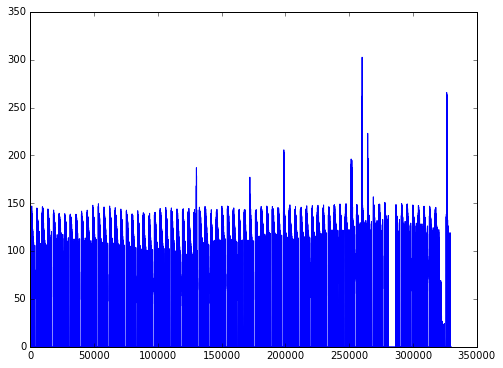

In [35]:
plot(Model)

(<matplotlib.collections.QuadMesh at 0xe25a048>,)

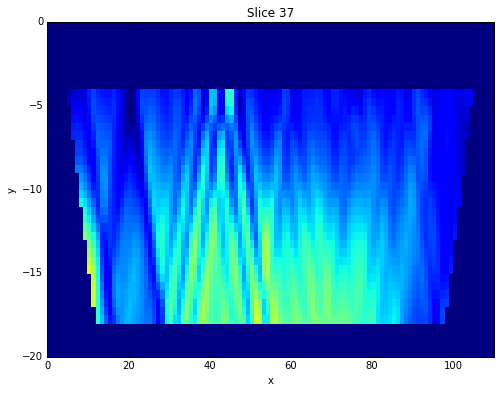

In [36]:
mesh.plotSlice(Model, clim=(50., 200.))

In [37]:
dzu = np.unique(dz)

In [38]:
def profile_time(i_n, color):
    figsize(6,3)
    ind = np.argwhere(dz == dzu[::-1][i_n])
    nskip = 5
    for i in range(0,ind.size,nskip):
        plt.semilogy(DATA[ind.flatten()[i],:], color)
        plt.tight_layout()
    plt.ylim(50, 200)    


C:\Users\sungkeun\Anaconda2\lib\site-packages\matplotlib\scale.py:93: RuntimeWarning: invalid value encountered in less_equal
  mask = a <= 0.0


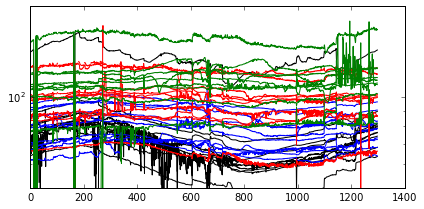

In [39]:
colors = ['k', 'b', 'r', 'g']
inds = [0, 2, 4, 6]
for i, ind in enumerate(inds):
    profile_time(ind,colors[i])

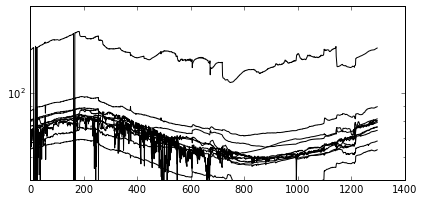

In [40]:
profile_time(0, 'k')

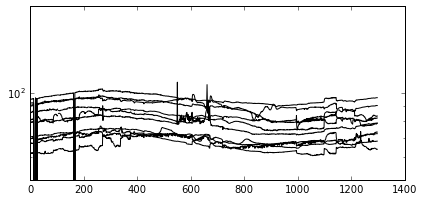

In [41]:
profile_time(2, 'k')

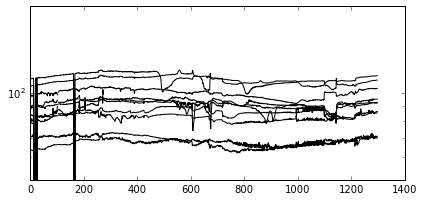

In [42]:
profile_time(3, 'k')

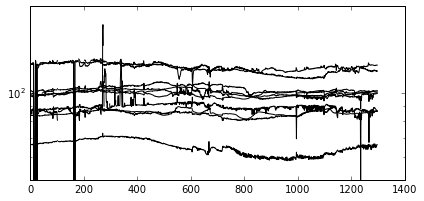

In [43]:
profile_time(4, 'k')

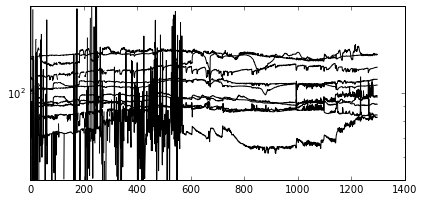

In [44]:
profile_time(5, 'k')

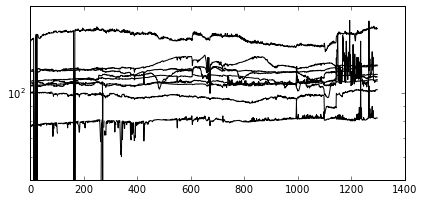

In [45]:
profile_time(6, 'k')

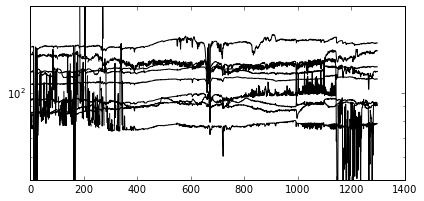

In [46]:
profile_time(7, 'k')